In [1]:
import numpy as np
import keras
from keras.models import Sequential, load_model

C:\Users\Jerry\AppData\Roaming\Python\Python36\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

In [2]:
model = load_model('recommendation.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


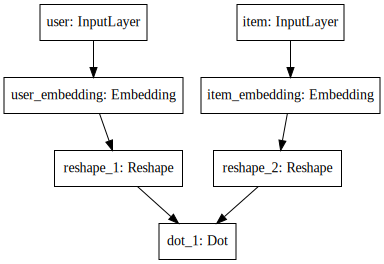

In [6]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [3]:
weights = model.get_weights()

In [4]:
user_embeddings = weights[0]
item_embeddings = weights[1]

In [27]:
print(item_embeddings.shape)

(3549, 30)


In [5]:
EPSILON = 1e-07

def cosine(x, y):
    dot_pdt = np.dot(x, y.T)
    norms = np.linalg.norm(x) * np.linalg.norm(y)
    return dot_pdt / (norms + EPSILON)


def cosine_similarities(x,embeddings):
    dot_pdt = np.dot(embeddings, x)
    norms = np.linalg.norm(x) * np.linalg.norm(embeddings,axis = 1)
    return dot_pdt / (norms + EPSILON)

# Computes euclidean distances between x and all item embeddings
def euclidean_distances(x,embeddings):  
    return np.linalg.norm(embeddings - x,axis=1)

# Computes top_n most similar items to an idx
def most_similar(idx, embeddings,top_n=10,euclidian= False):
    if euclidian:
        # eucliedian distance between idx and the rest
        distance = euclidean_distances(embeddings[idx],embeddings)
        order = (distance).argsort()
        order= [x for x in order if x != idx]
        order= order[:top_n]
        return list( zip([x for x in order], distance[order]))
    else: 
        # cosine similarity between idx and the rest
        distance = cosine_similarities(embeddings[idx],embeddings)
        order = (-distance).argsort()
        order= [x for x in order if x != idx]
        order= order[:top_n]
        return list(zip([x for x in order], distance[order]))

In [7]:
most_similar(173,item_embeddings, top_n=10, euclidian=False)

[(665, 1.0),
 (435, 1.0),
 (662, 1.0),
 (430, 1.0),
 (340, 0.99999994),
 (664, 0.99999994),
 (54, 0.99999994),
 (1057, 0.99999994),
 (268, 0.9999999),
 (423, 0.9999999)]

In [8]:
np.save('user_embeddings',user_embeddings)

In [9]:
np.save('item_embeddings',item_embeddings)